In [1]:
import tcrgp
import pandas as pd
import pickle
import ast
import csv
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

/home/alex/anaconda3/envs/tfgp/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alex/anaconda3/envs/tfgp/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alex/anaconda3/envs/tfgp/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alex/anaconda3/envs/tfgp/lib/python3.6/site-packages

In [2]:
data = pd.read_csv('tcrgp_vdjdb.csv')
data = data.loc[data.Gene == 'TRB']
usecols = ['CDR3', 'V', 'J', 'Reference']
tcrs_vdj_all_new = {}

for epitope, edata in data.groupby('Epitope'):
    tcrs_vdj_all_new[epitope] = edata[usecols].values

In [3]:
tcrs_vdj = tcrs_vdj_all_new
epis_vdj = list(tcrs_vdj.keys())

In [4]:
cdrs = tcrgp.create_cdr_dict(alignment='imgt',species=['human'])

In [5]:
control_file = 'data/human_pairseqs_v1_parsed_seqs_probs_mq20_clones_random_nbrdists.tsv'
store_fields=['va_reps','vb_reps','cdr3a','cdr3b']
controls=[]
with open(control_file, newline='') as tsvfile:
    reader = csv.DictReader(tsvfile,delimiter='\t')
    for row in reader:
        entry = [row[s] for s in store_fields]
        cA = cdrs['human']['A'][entry[0].split(';')[0]]
        cB = cdrs['human']['B'][entry[1].split(';')[0]]
        if '*' not in ''.join(cB)+''.join(cA)+entry[2]+entry[3]:
            controls.append(entry)
            
n_controls = len(controls)

In [6]:
for epi in epis_vdj:
    n_e = len(tcrs_vdj[epi])
    with open('training_data/examples/vdj_human_'+epi+'.csv','w') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['epitope','subject','va','vb','cdr3a','cdr3b'])
        for row in tcrs_vdj[epi]:
            writer.writerow([epi,row[3],'',row[1],'',row[0]])
        for i in np.random.choice(range(n_controls),n_e).astype(int):
            writer.writerow(['none','control','',controls[i][1],'',controls[i][3]])

In [7]:
subsmat = tcrgp.subsmatFromAA2('HENS920102')
pc_blo = tcrgp.get_pcs(subsmat,d=21)

human ATDALMTGY: 7 subjects, 207 positive and 207 control samples
[1.0]
Computing fold: 1/7[1.0]
Computing fold: 2/7[1.0]
Computing fold: 3/7[1.0]
Computing fold: 4/7[1.0]
Computing fold: 5/7[1.0]
Computing fold: 6/7[1.0]
All folds (7) computed.  


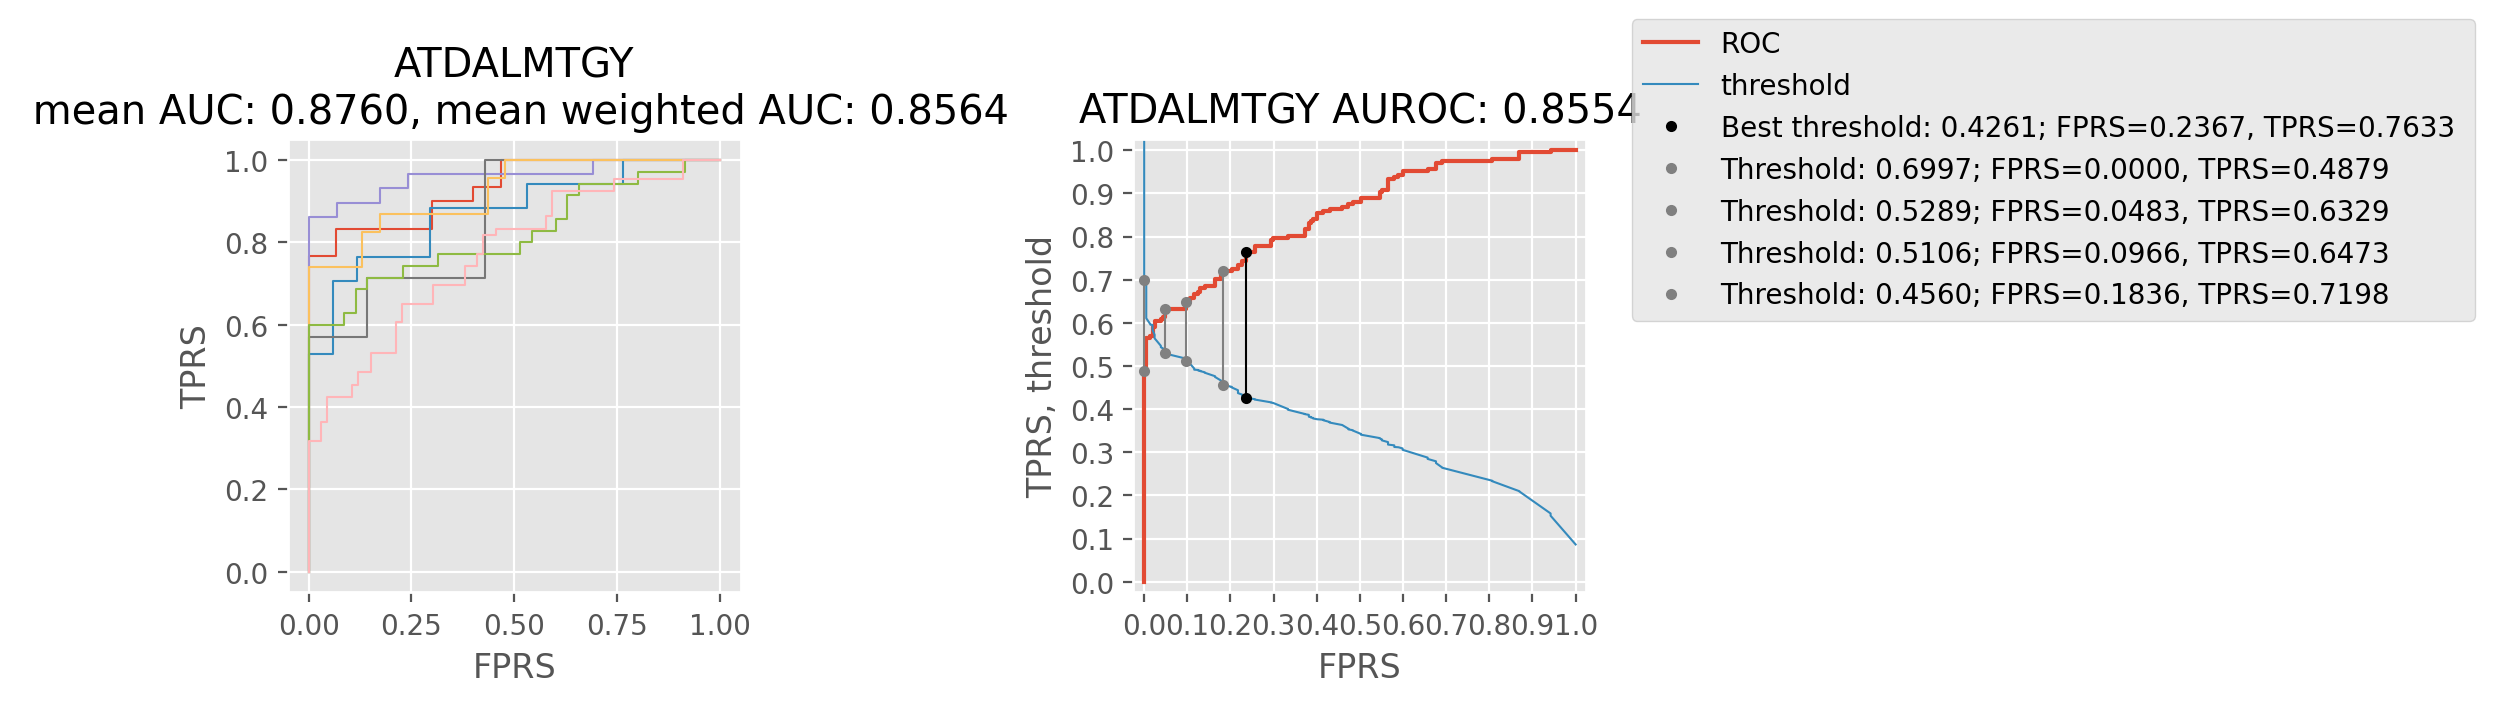

In [8]:
_,_,_,_ = tcrgp.loso('training_data/examples/vdj_human_ATDALMTGY.csv',
                     'human',
                     'ATDALMTGY',
                     pc_blo,
                     cdr_types=[[],['cdr3']],
                     m_iters=500,
                     lr=0.005,
                     nZ=0,
                     mbs=0,
                     va='va',
                     vb='vb',
                     cdr3a=None,
                     cdr3b='cdr3b',
                     epis='epitope',
                     subs='subject')

human ATDALMTGY: 7 subjects, 207 positive and 207 control samples
[1.0]
Computing fold: 1/7[1.0]
Computing fold: 2/7[1.0]
Computing fold: 3/7[1.0]
Computing fold: 4/7[1.0]
Computing fold: 5/7[1.0]
Computing fold: 6/7[1.0]
All folds (7) computed.  


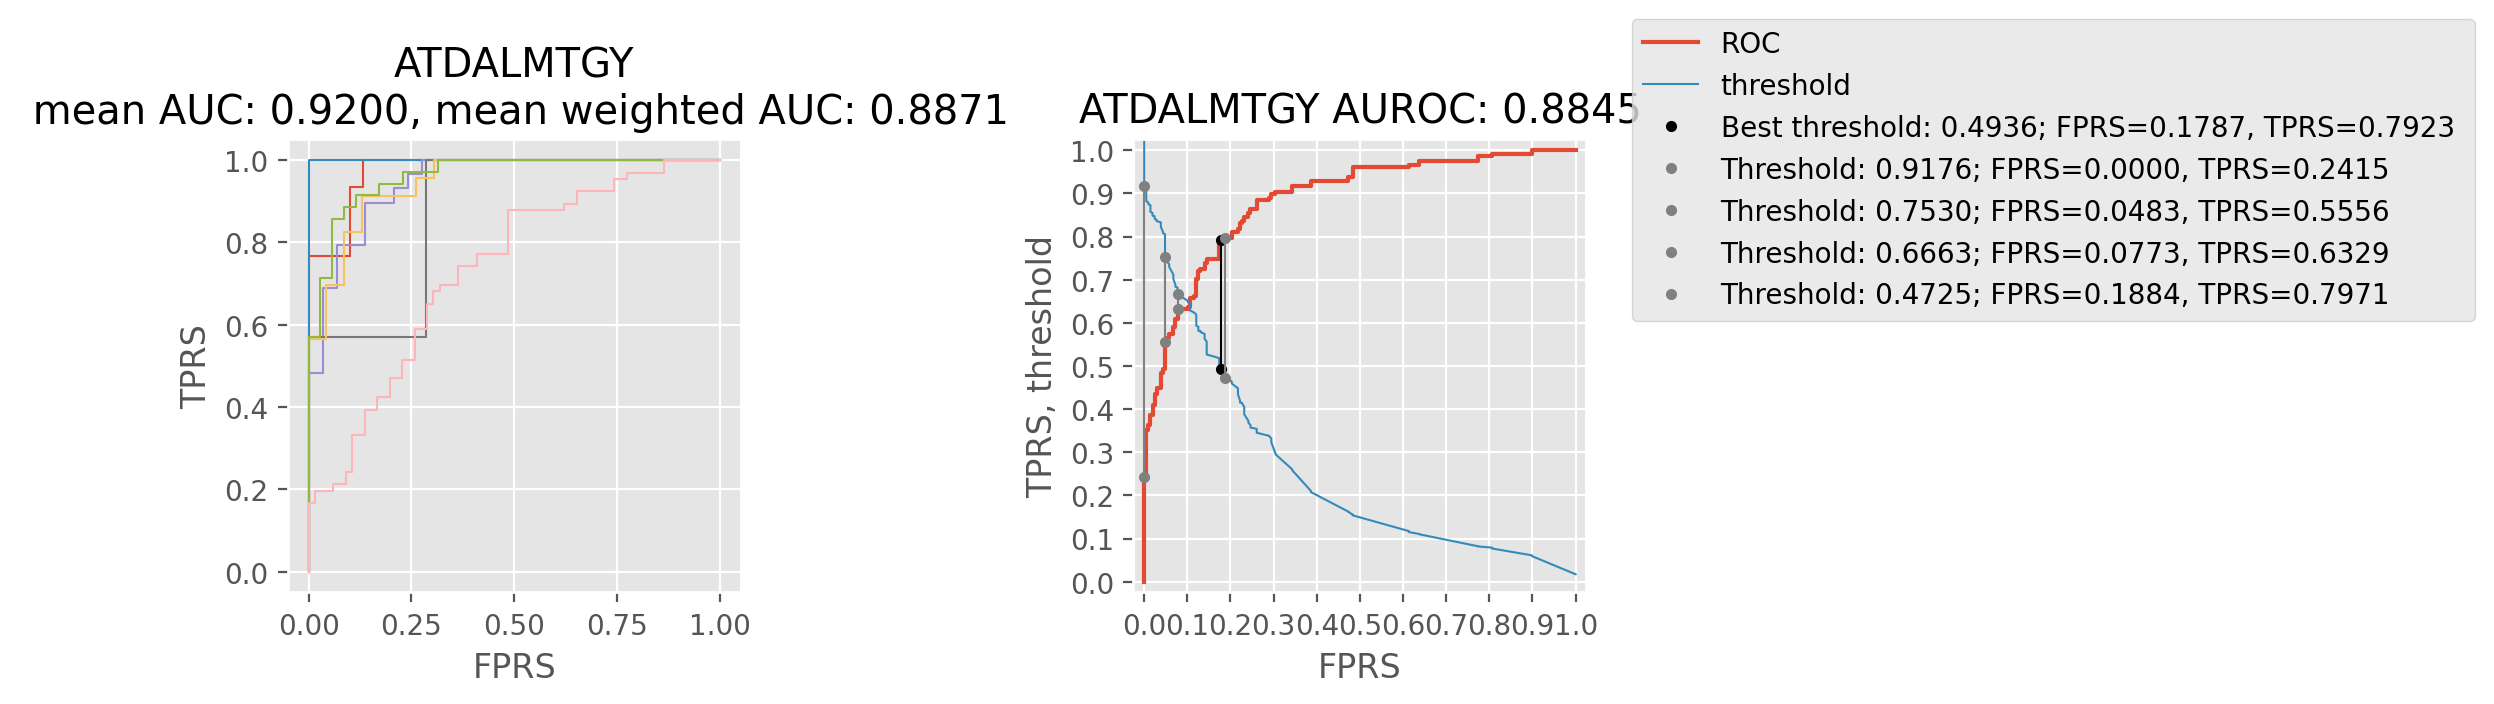

In [9]:
_,_,_,_ = tcrgp.loso('training_data/examples/vdj_human_ATDALMTGY.csv',
                     'human',
                     'ATDALMTGY',
                     pc_blo,
                     cdr_types=[[],['cdr3','cdr1','cdr2','cdr25']],
                     m_iters=500,
                     lr=0.005,
                     nZ=0,
                     mbs=0,
                     va=None,
                     vb='vb',
                     cdr3a=None,
                     cdr3b='cdr3b',
                     epis='epitope',
                     subs='subject')

human ATDALMTGY: 7 subjects, 207 positive and 207 control samples
[1.0]


/home/alex/anaconda3/envs/tfgp/lib/python3.6/site-packages/scipy/cluster/vq.py:574: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


Computing fold: 1/7[1.0]
Computing fold: 2/7[1.0]
Computing fold: 3/7[1.0]
Computing fold: 4/7[1.0]
Computing fold: 5/7[1.0]
Computing fold: 6/7[1.0]
All folds (7) computed.  


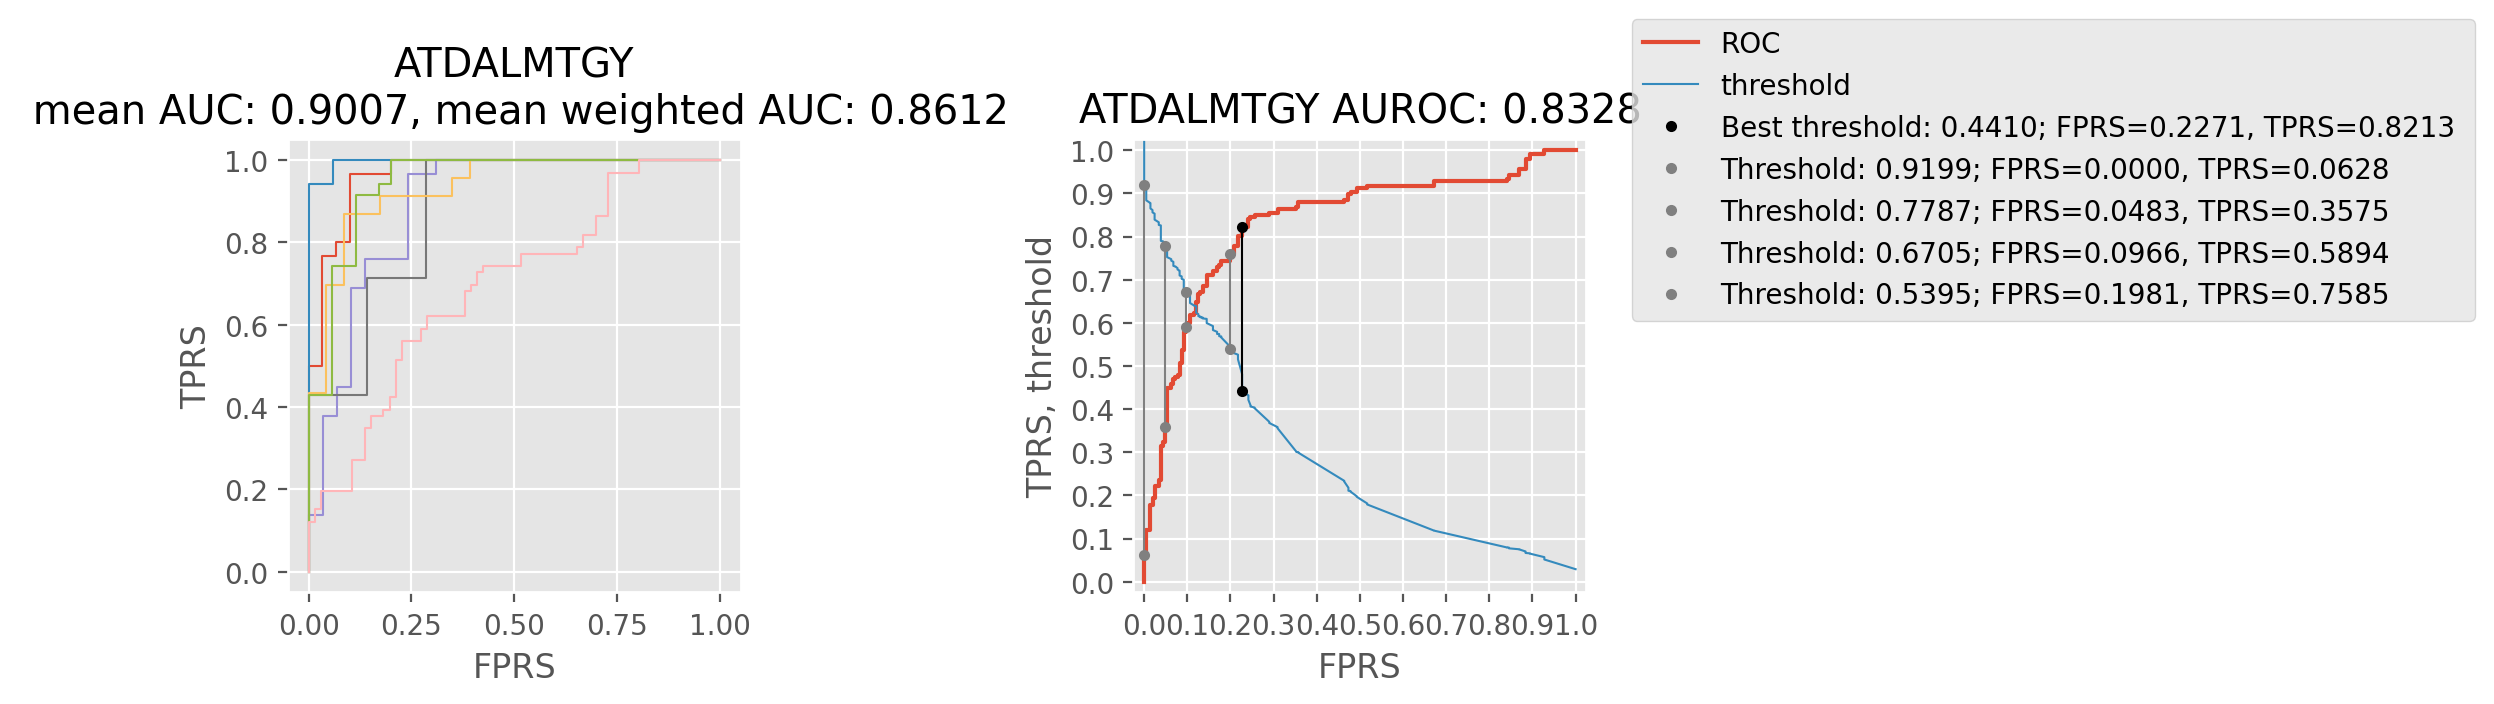

In [10]:
_,_,_,_ = tcrgp.loso('training_data/examples/vdj_human_ATDALMTGY.csv',
                     'human',
                     'ATDALMTGY',
                     pc_blo,
                     cdr_types=[[],['cdr3','cdr1','cdr2','cdr25']],
                     m_iters=500,
                     lr=0.005,
                     nZ=60,
                     mbs=100,
                     va=None,
                     vb='vb',
                     cdr3a=None,
                     cdr3b='cdr3b',
                     epis='epitope',
                     subs='subject')